In [18]:
from stable_baselines3 import A2C
from DRL.myEnv import MinimalEnv
from DRL.myModel import CustomCNN_mask_feat

In [19]:
n_actions = 6  # num of action spcae dim
N_CHANNELS = 4 # num of image channel
THUMBSIZE = 1024 # size of the resized global scale thumbnail
PATCHSIZE = 512  # size of the local scale image patch

In [20]:
# initialize the scale control agent
env = MinimalEnv(n_actions, N_CHANNELS, THUMBSIZE)
policy_kwargs = dict(
    features_extractor_class=CustomCNN_mask_feat,
    features_extractor_kwargs=dict(features_dim=512, model_name='resnet18'),
)
agent = A2C('CnnPolicy', env, policy_kwargs=policy_kwargs)
agent = agent.load(r"C:\Users\Galaxy\Downloads\model.zip") # replace by your weights path

building  resnet18
building  resnet18


image size: (8334, 8334, 4)


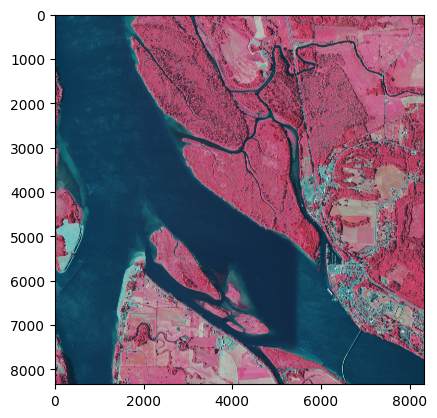

In [16]:
# visiualize the HSR image
import matplotlib.pyplot as plt
import tifffile as tiff

img = tiff.imread(r"examples\Example.tif")
print("image size:",img.shape)
plt.imshow(img[:,:,[0,1,2]]);

In [ ]:
# predict the scale map by the agent
# some bug to be fixed when predicting image of arbitrary size
from DRL.main import pred_main
pred_main(agent, r"examples\Example.tif",r"examples\Example_scalemap.tif", PATCHSIZE, THUMBSIZE)

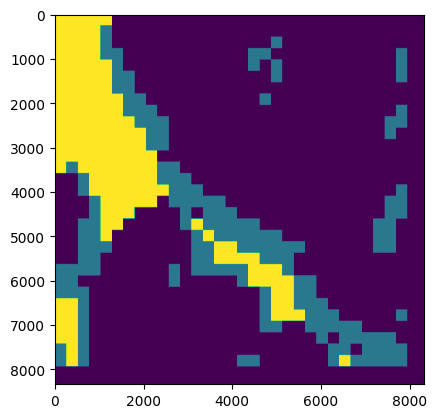

In [15]:
# visiualize the action map
scale_map = tiff.imread(r"examples\Example_scalemap.tif")
plt.imshow(scale_map);